In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, robust_scale, minmax_scale

In [2]:
ds_fitness = pd.read_csv("./FITNESS_결측.csv",engine="python")
ds_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [3]:
ds_fitness.isnull()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [4]:
ds_fitness.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [5]:
ds_fitness["GENDER"].fillna("여성", inplace =True)
ds_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [6]:
ds_fitness.groupby("GENDER")["WEIGHT"].agg("mean")

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [7]:
ds_fitness.groupby("GENDER")["WEIGHT"].transform("mean").head()

0    72.908750
1    72.908750
2    72.908750
3    72.908750
4    82.433077
Name: WEIGHT, dtype: float64

In [8]:
ds_fitness["WEIGHT"]=ds_fitness["WEIGHT"].fillna(ds_fitness.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)
ds_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


In [10]:
ds_fitness_char = ds_fitness.select_dtypes(include ="object")
ds_fitness_numeric = ds_fitness.select_dtypes(exclude ="object")

In [11]:
ds_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


In [17]:
ds_scale = scale(ds_fitness_numeric)
ds_scale = pd.DataFrame(ds_scale,columns = ds_fitness_numeric.columns)
ds_scale.head()


C:\Users\admin1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.839365,-1.137916,2.327059,-1.770249,-0.361434,-0.951242,-0.196803
1,-1.533241,0.528757,2.419415,-1.433216,0.035184,-0.494940,1.356151
2,-0.665896,1.011023,1.320686,-1.418562,-1.352978,-0.666054,-0.640504
3,0.548385,-0.807497,1.383275,-1.220739,-2.344523,-0.494940,-2.082533
4,0.374916,0.597149,0.339692,-1.198758,1.026728,-0.723091,1.245226


In [18]:
ds_scale_describe = ds_scale.describe()
ds_scale_describe.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000,31.000,31.000,31.000,31.000,31.000,31.000
mean,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.707,-2.240,-1.906,-1.770,-2.345,-0.951,-2.083
25%,-0.666,-0.524,-0.460,-0.591,-0.659,-0.495,-0.641
50%,0.201,-0.008,-0.115,-0.085,0.035,-0.210,-0.197
75%,0.722,0.618,0.526,0.501,0.630,0.218,0.691
max,1.763,1.714,2.419,2.523,1.622,4.981,2.022


In [19]:
ds_minmax_scale = minmax_scale(ds_fitness_numeric)
ds_minmax_scale = pd.DataFrame(ds_minmax_scale,columns = ds_fitness_numeric.columns)
ds_minmax_scale.head()


C:\Users\admin1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  """Entry point for launching an IPython kernel.


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459
1,0.05,0.700154,1.000000,0.078498,0.60,0.076923,0.837838
2,0.30,0.822120,0.745974,0.081911,0.25,0.048077,0.351351
3,0.65,0.362212,0.760445,0.127986,0.00,0.076923,0.000000
4,0.60,0.717450,0.519169,0.133106,0.85,0.038462,0.810811


In [20]:

ds_minmax_scale_describe = ds_minmax_scale.describe()
ds_minmax_scale_describe.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000,31.000,31.000,31.000,31.000,31.000,31.000
mean,0.492,0.566,0.441,0.412,0.591,0.160,0.507
std,0.293,0.257,0.235,0.237,0.256,0.171,0.248
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.434,0.334,0.275,0.425,0.077,0.351
50%,0.550,0.564,0.414,0.392,0.600,0.125,0.459
75%,0.700,0.723,0.562,0.529,0.750,0.197,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [21]:
ds_robust_scale = robust_scale(ds_fitness_numeric)
ds_robust_scale = pd.DataFrame(ds_robust_scale,columns = ds_fitness_numeric.columns)
ds_robust_scale.head()

ds_robust_scale_describe = ds_robust_scale.describe()
ds_robust_scale_describe.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000,31.000,31.000,31.000,31.000,31.000,31.000
mean,-0.145,0.007,0.116,0.078,-0.027,0.294,0.148
std,0.733,0.890,1.031,0.931,0.789,1.426,0.764
min,-1.375,-1.953,-1.817,-1.544,-1.846,-1.040,-1.417
25%,-0.625,-0.452,-0.350,-0.463,-0.538,-0.400,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.375,0.548,0.650,0.537,0.462,0.600,0.667
max,1.125,1.507,2.571,2.389,1.231,7.280,1.667


In [22]:
ds_rstpulse = pd.DataFrame()
ds_rstpulse["Raw"] = ds_fitness["RSTPULSE"]
ds_rstpulse["Scale"] = ds_fitness["RSTPULSE"]
ds_rstpulse["Robust"] = ds_fitness["RSTPULSE"]
ds_rstpulse["MinMax"] = ds_fitness["RSTPULSE"]
ds_rstpulse.round(3)

,Raw,Scale,Robust,MinMax
0,40,40,40,40
1,48,48,48,48
2,45,45,45,45
3,48,48,48,48
4,44,44,44,44
5,55,55,55,55
6,56,56,56,56
7,48,48,48,48
8,49,49,49,49
9,48,48,48,48


AxesSubplot(0.125,0.125;0.775x0.755)


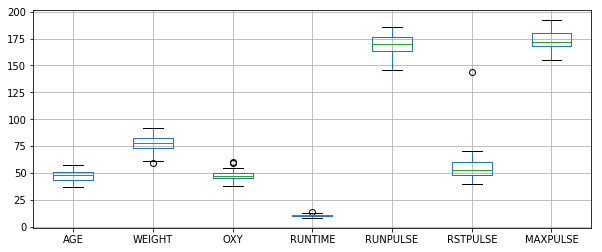

In [25]:
print(ds_fitness.boxplot(figsize = (10,4)))

In [26]:
ds_fitness["RSTPULSE"] >= 100


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
Name: RSTPULSE, dtype: bool

In [28]:
ds_fitness = ds_fitness[ds_fitness["RSTPULSE"]<100]
ds_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


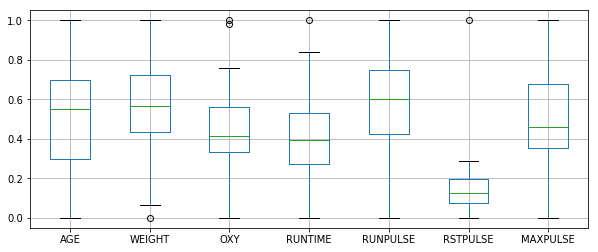

In [35]:
ds_minmax_scale.boxplot(figsize = (10,4))